# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
x=np.linspace(0,50,100)
m=3
c=5
y=m*x+c

noise=np.random.normal(0,1,100)
y=y+noise

In [3]:
x=x.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [4]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [5]:
print(model.coef_)
print(model.intercept_)

[2.99610271]
5.155054911905879


In [6]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [7]:
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R2:", r2_score(y_train, y_train_pred))

Train MAE: 0.8382475664158182
Train MSE: 1.1575967942796261
Train R2: 0.9994229555528666


In [8]:
print("Test MAE:", mean_absolute_error(y_test,y_test_pred))
print("Test MSE:", mean_squared_error(y_test,y_test_pred))
print("Test R2:", r2_score(y_test,y_test_pred))

Test MAE: 0.9886743411170176
Test MSE: 1.4192130836480672
Test R2: 0.9990719746161077


# Model performance
1. Model coef and intercept are very close to m=3 and c=5
2. R2 score in both test and training is very close to 1 which indicates a perfect model
3. no overfitting or underfitting

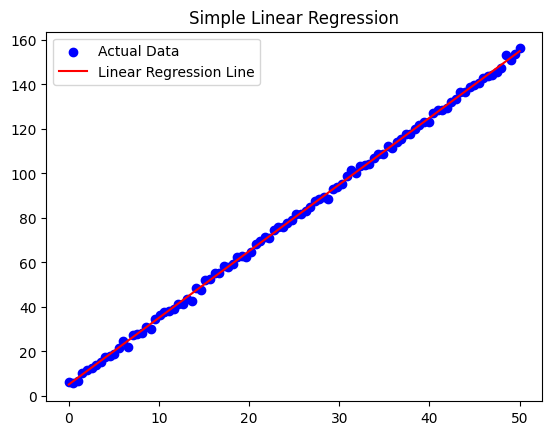

In [9]:
predictions=model.predict(x)
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, predictions, color='red', label='Linear Regression Line')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [10]:
np.random.seed(42)
x1 = np.random.uniform(0, 50, 150)
x2 = np.random.uniform(0, 50, 150)
x=np.column_stack((x1, x2))

In [11]:
a1=3
a2=5
c=4
y=a1*x1+a2*x2+c
noise=np.random.normal(0,1,150)
y=y+noise

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [14]:
print(model.coef_)
print(model.intercept_)

[3.00675536 4.99130998]
4.146340969365468


In [15]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [16]:
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R2:", r2_score(y_train, y_train_pred))

Train MAE: 0.651237103890552
Train MSE: 0.6809428222089298
Train R2: 0.999909007668745


In [17]:
print("Test MAE:", mean_absolute_error(y_test,y_test_pred))
print("Test MSE:", mean_squared_error(y_test,y_test_pred))
print("Test R2:", r2_score(y_test,y_test_pred))

Test MAE: 1.018862698769374
Test MSE: 1.5372305476094286
Test R2: 0.9997888907771998


# Model performance
1. Model coef and intercept are very close to a1=3, a2=5, c=4
2. R2 score in both test and training is very close to 1 which indicates a perfect model
3. no overfitting or underfitting

# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [18]:
x=np.linspace(0,10,100)
x=x.reshape(-1,1)
a=2
b=3
c=5
y=a*(x**2)+b*x+c
noise=np.random.normal(0,1,100)
y=y+noise

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,include_bias=False)
x_poly = poly.fit_transform(x)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.2)

In [21]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [22]:
print("b = ",model.coef_[0][0])
print("a = ",model.coef_[0][1])
print("c = ",model.intercept_[0])

b =  2.9999999999999996
a =  2.0
c =  5.0508425691361225


In [23]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [24]:
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R2:", r2_score(y_train, y_train_pred))

Train MAE: 2.5659141478229232e-14
Train MSE: 9.177126566189068e-28
Train R2: 1.0


In [25]:
print("Test MAE:", mean_absolute_error(y_test,y_test_pred))
print("Test MSE:", mean_squared_error(y_test,y_test_pred))
print("Test R2:", r2_score(y_test,y_test_pred))

Test MAE: 2.3810953209135735e-14
Test MSE: 8.598531604874056e-28
Test R2: 1.0


# Model performance
1. Model coef and intercept are very close to a=2, b=3, c=5
2. R2 score in both test and training is very close to 1 which indicates a perfect model
3. no overfitting or underfitting

## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [3]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'airlines-flights-data' dataset.
Path to dataset files: /kaggle/input/airlines-flights-data


In [4]:
os.listdir(path)

['airlines_flights_data.csv']

In [5]:
full_path = os.path.join(path,os.listdir(path)[0])

In [6]:
import pandas as pd
df = pd.read_csv(full_path)

In [7]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


# Data Visualization

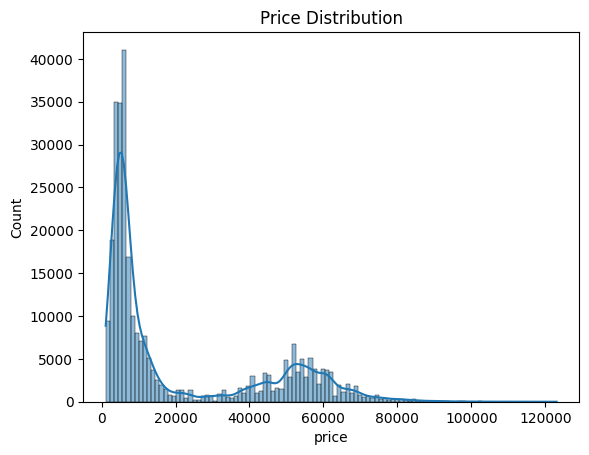

In [12]:
sns.histplot(df["price"], kde=True)
plt.title("Price Distribution")
plt.show()

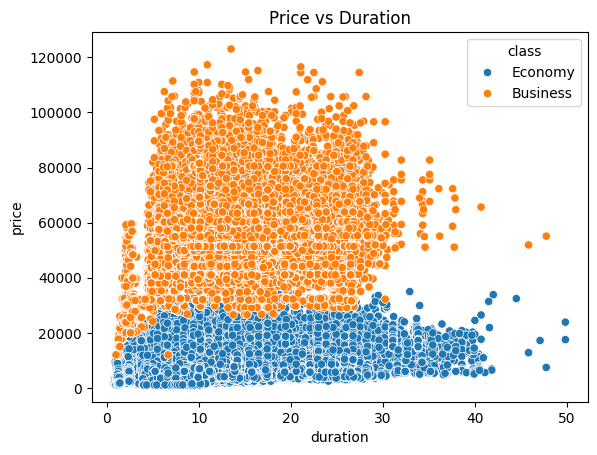

In [13]:
sns.scatterplot(x='duration',y='price',hue='class',data=df)
plt.title("Price vs Duration")
plt.show()

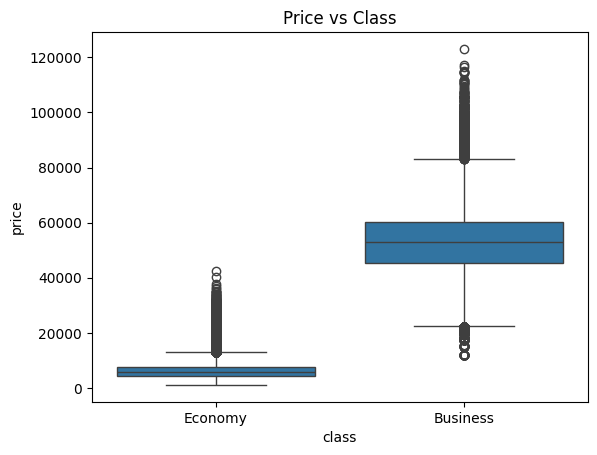

In [14]:
sns.boxplot(x='class',y='price',data=df)
plt.title("Price vs Class")
plt.show()

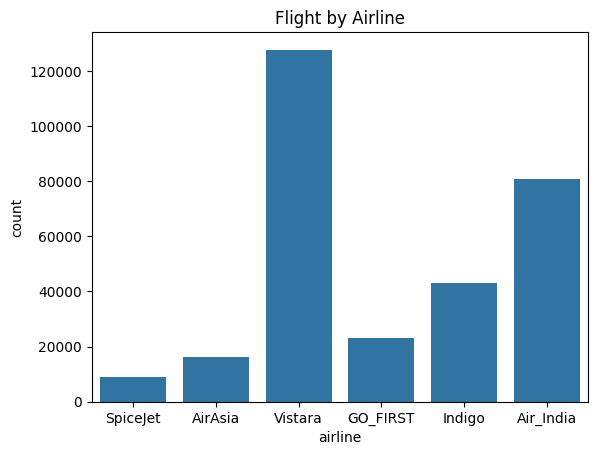

In [15]:
sns.countplot(x="airline",data=df)
plt.title("Flight by Airline")
plt.show()

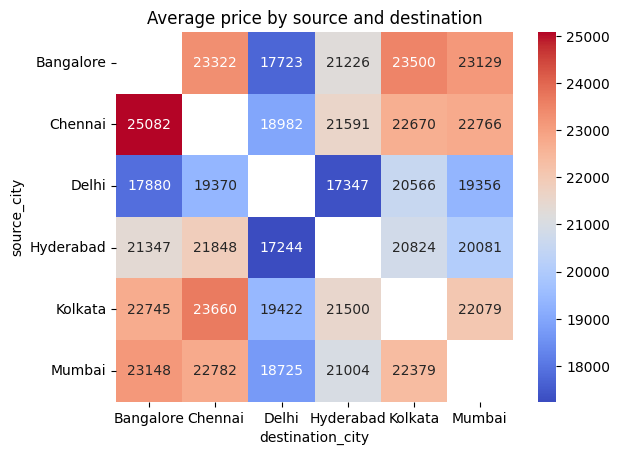

In [16]:
pivot_route = df.pivot_table(index="source_city",columns="destination_city",values="price")
sns.heatmap(pivot_route, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Average price by source and destination")
plt.show()


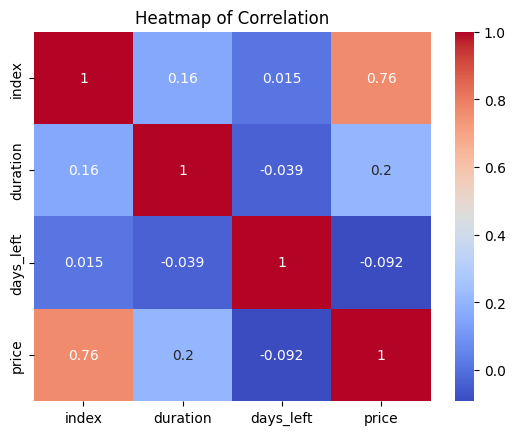

In [17]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])
corr = numerical_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap of Correlation")
plt.show()

# Data Preprocessing

In [19]:
x= df.drop(["price","flight"],axis=1) #feature
y=df["price"] #target
num_cols = x.select_dtypes(include=["int64", "float64"]).columns
cat_cols = x.select_dtypes(include=["object"]).columns

In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num',StandardScaler(),num_cols),('cat', OneHotEncoder(handle_unknown="ignore"), cat_cols)])

# Splitting data

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
x_train_p = preprocessor.fit_transform(x_train)
x_test_p = preprocessor.transform(x_test)

# Modeling

In [24]:
model=LinearRegression()
model.fit(x_train_p,y_train)

LinearRegression()

# Model Evaluation

In [25]:
y_train_pred = model.predict(x_train_p)
y_test_pred = model.predict(x_test_p)

In [26]:
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R2:", r2_score(y_train, y_train_pred))

Train MAE: 4553.992593375462
Train MSE: 45225080.83829778
Train R2: 0.912203587405749


In [27]:
print("Test MAE:", mean_absolute_error(y_test,y_test_pred))
print("Test MSE:", mean_squared_error(y_test,y_test_pred))
print("Test R2:", r2_score(y_test,y_test_pred))

Test MAE: 4536.406991261038
Test MSE: 45386562.60544392
Test R2: 0.9119532039555578


# Save the model

In [28]:
import joblib
joblib.dump(model, "flight_price_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

# Model performance
1. Train and Test errors are very close, good fit
2. R2 score in both test and training is close to 1 which indicates a perfect model
3. no overfitting or underfitting